In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [ ]:
# Basic checks of the dataset

In [3]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
data.shape

(30, 17)

In [ ]:
#EDA

In [6]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [ ]:
# Mean and Std numbers are seems fine

In [ ]:
#check for NaNs

In [7]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [8]:
x = data.drop(columns = 'W', axis =1)
y = data['W']

In [9]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


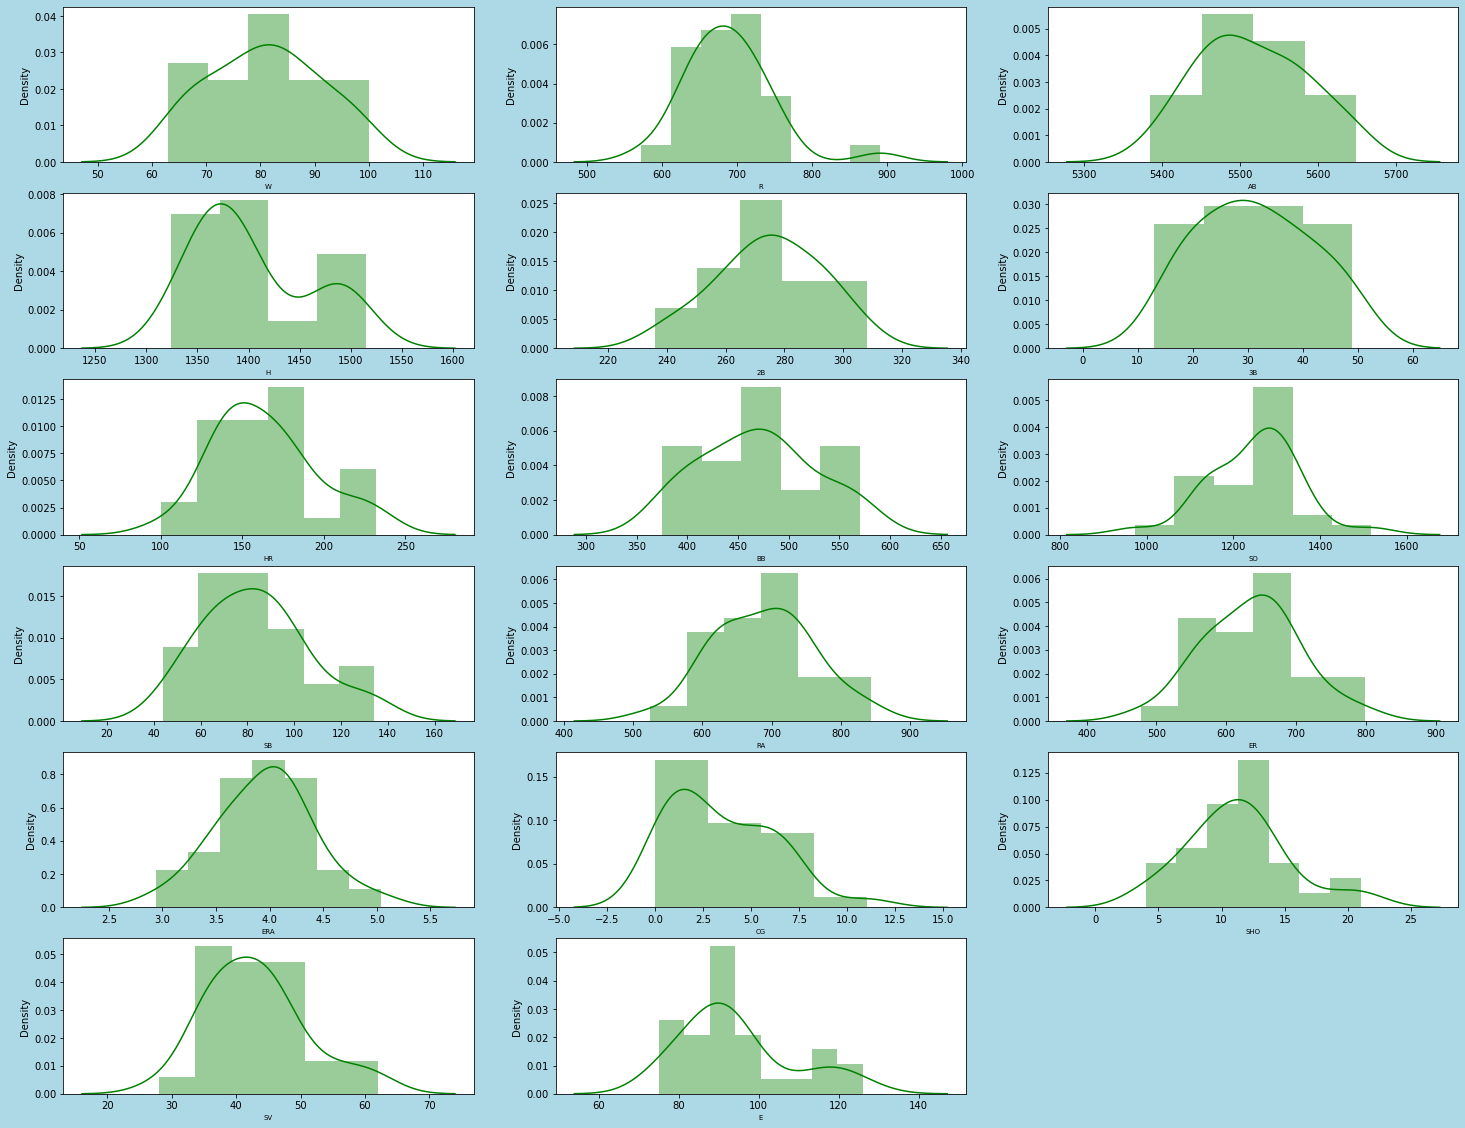

In [20]:
plt.figure(figsize=(25,20),facecolor='lightblue')
plotnumber = 1


for column in data:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(data[column],color = 'green')
        plt.xlabel(column,fontsize=7)
        
    plotnumber+=1
plt.show()

In [ ]:
# dist plot observations:
# 1.SB & CG have outlier.

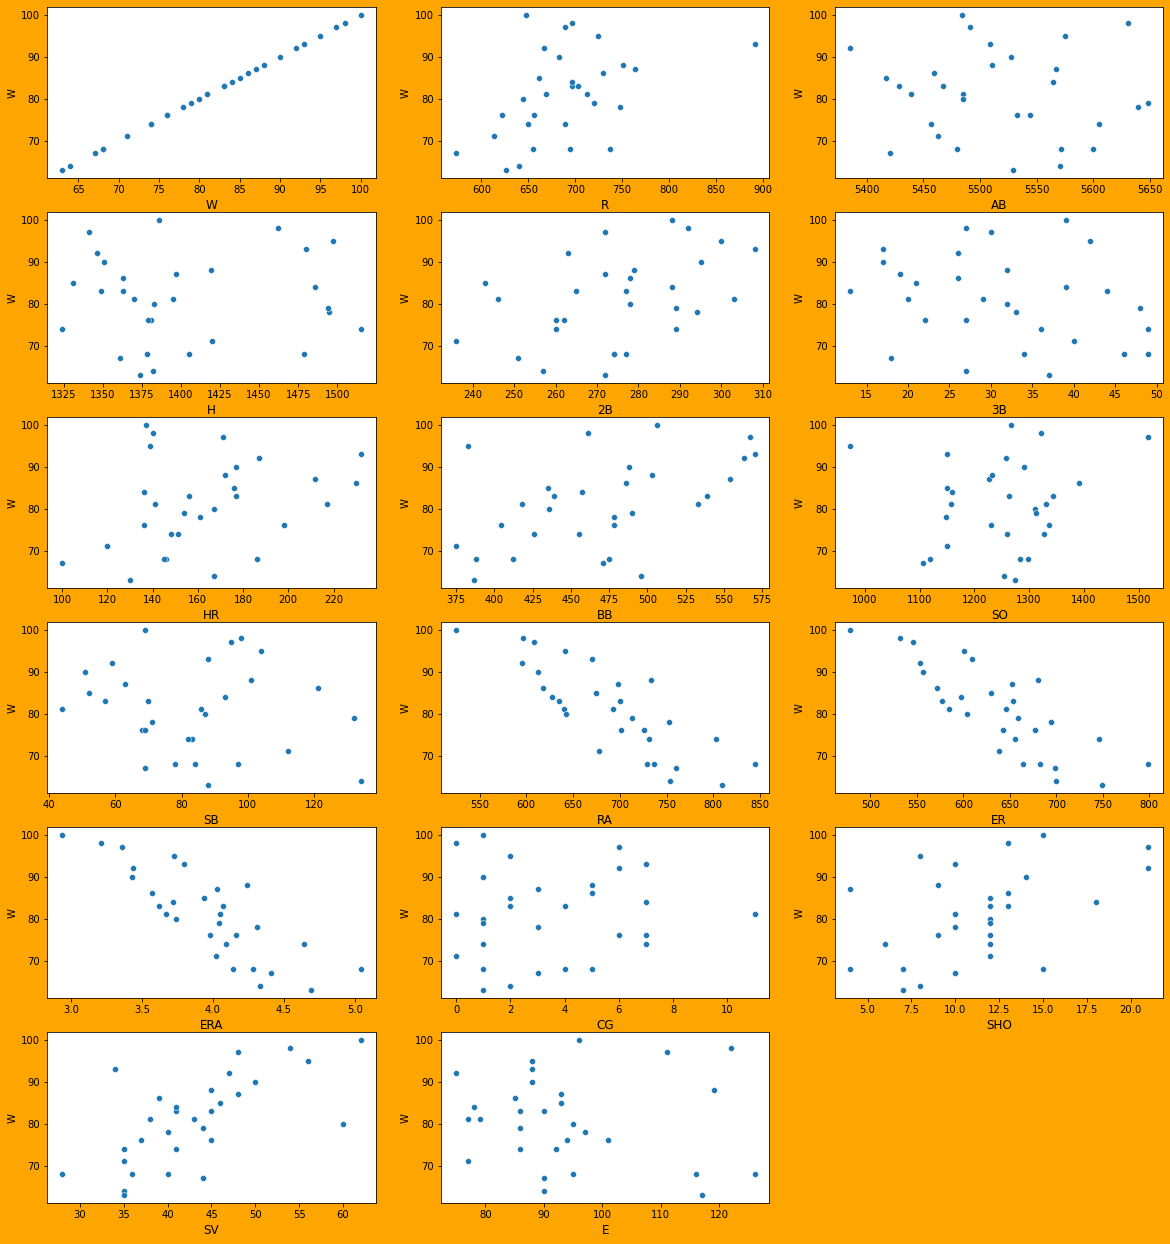

In [17]:
plt.figure(figsize=(20,22),facecolor='orange')
plotnumber = 1


for column in data:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.scatterplot(data[column],y)
        plt.xlabel(column,fontsize=12)
        
    plotnumber+=1
plt.show()

In [ ]:
# Scatter plot
# Data is uniformly scattered with respect to W for all features.

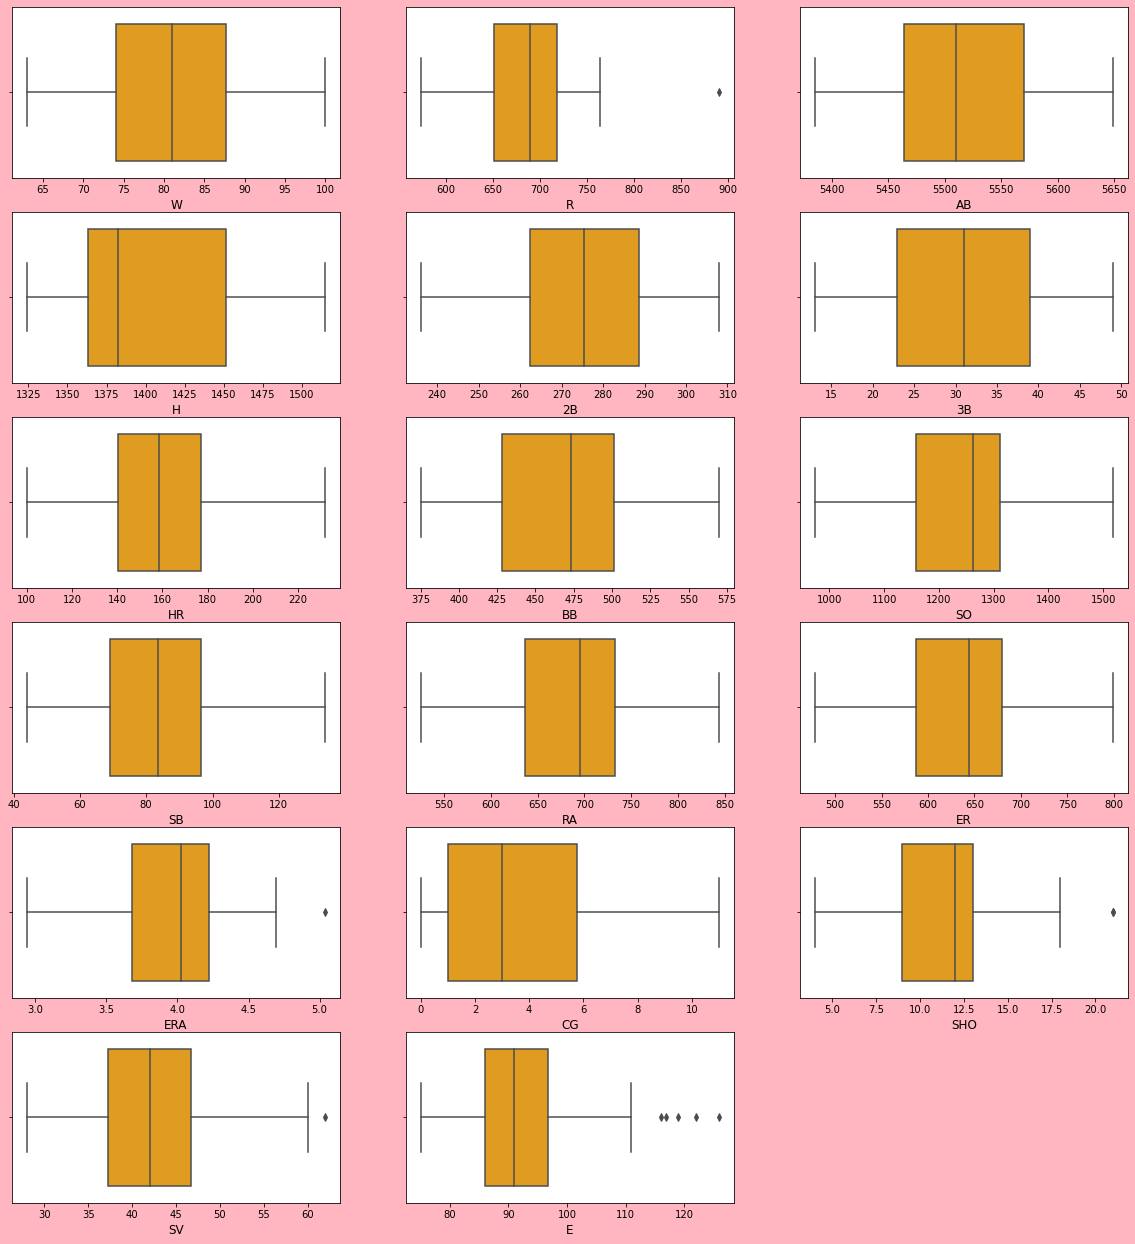

In [22]:
plt.figure(figsize=(20,22),facecolor='lightpink')
plotnumber = 1


for column in data:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(data[column],color = 'orange')
        plt.xlabel(column,fontsize=12)
        
    plotnumber+=1
plt.show()

In [ ]:
# Box Plot analysis
# R, ERA, SHO, SV, E have outliers but its low. E have higher outlier which need to be treated.

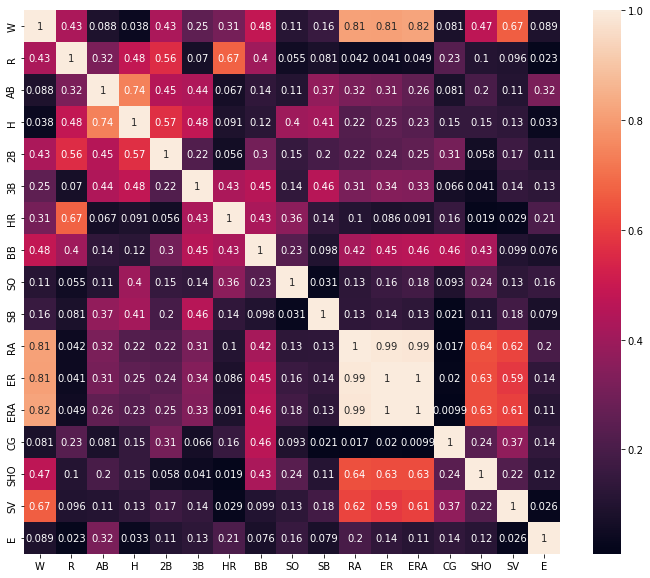

In [25]:
df_corr = data.corr().abs()

plt.figure(figsize =(12, 10))
sns.heatmap(df_corr, annot = True, annot_kws={'size' :10})
plt.show()

In [ ]:
# Heatmap analysis for Corelation
# Here, RA,ER and ERA have higher corelation.Will remove RA and ER from data set and will retain ERA since it has higher relation to W when compared to other two.
# H & AB have linearity. Will remove H and will retain AB since AB has higher linearity with W.
# other features have lesser colinearity compared to above cases.

In [ ]:
#VIZUALIZE THE CORELATION

In [31]:
from sklearn.preprocessing import StandardScaler

<AxesSubplot:>

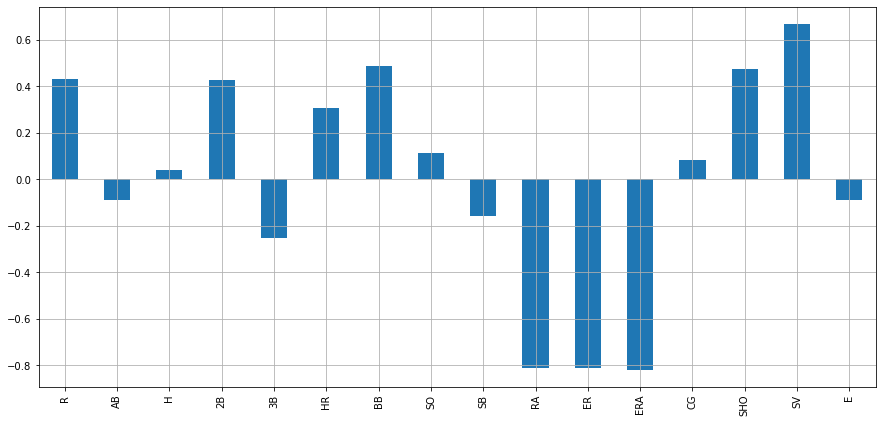

In [36]:
data.drop('W',axis =1).corrwith(data.W).plot(kind = 'bar', grid=True, figsize = (15,7))

In [ ]:
#feature selction using Select Percentile chi2

In [37]:
from sklearn.feature_selection import SelectPercentile, chi2

In [44]:
x = data.drop('W',axis =1)
y = data.W

SPercentile = SelectPercentile(score_func = chi2, percentile = 90)

selection =  SPercentile.fit(x, y)

In [45]:
cols = selection.get_support(indices = True)
print("indices =",cols)

features = x.columns[cols]
print("fetaures = ",features)

indices = [ 0  2  3  4  5  6  7  8  9 10 12 13 14 15]
fetaures =  Index(['R', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'CG', 'SHO',
       'SV', 'E'],
      dtype='object')


In [49]:
scores = pd.DataFrame({'Features' :x.columns, 'chi2_score':selection.scores_, 'p_value' : selection.pvalues_})
scores.sort_values(by ='chi2_score', ascending = False)

,Features,chi2_score,p_value
7,SO,213.268413,8.938748e-33
9,RA,197.781566,9.420381e-30
10,ER,192.499607,9.976463e-29
8,SB,166.938124,8.089020e-24
6,BB,161.137711,1.019445e-22
5,HR,142.024649,3.903996e-19
0,R,137.220468,3.022392e-18
4,3B,77.453674,8.163669e-08
15,E,54.037102,2.646094e-04
2,H,50.277253,8.471974e-04


In [50]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,11.522370,R
1,13.311532,AB
2,10.070668,H
3,4.019297,2B
4,3.294146,3B
5,10.079902,HR
6,3.806098,BB
7,2.652401,SO
8,2.102684,SB
9,191.839155,RA


In [56]:
# DATA PREPROCESSING

In [ ]:
#removing outliers

In [69]:
from scipy.stats import zscore
import numpy as np
z_score =zscore(data[['E']])
scaled_z_score = np.abs(z_score)
filtering_entry =(scaled_z_score <2).all(axis=1)
data = data[filtering_entry]

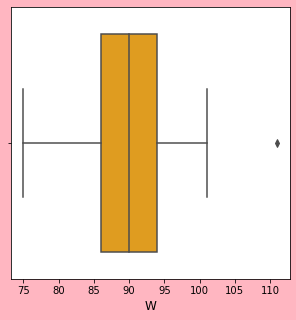

In [74]:
plt.figure(figsize=(5,5),facecolor='lightpink')
plotnumber = 1


for column in data:
    if plotnumber<=1:
        ax=plt.subplot(1,1,plotnumber)
        sns.boxplot(data['E'],color = 'orange')
        plt.xlabel(column,fontsize=12)
        
    plotnumber+=1
plt.show()

In [ ]:
# removing the colinear features
# already planned to drop RA, ER & H features. But the relation between RA, ER & ERA from Colinearity check wit W says, RA has higher relation with W. so i will drop ERA instead of RA.
# Final features to drop ER, ERA, H.W will be removed as a target label

In [72]:
X = data.drop(columns = ['ER', 'ERA', 'H', 'W'], axis = 1)
Y = data.W

In [77]:
X_scaled = scaler.fit_transform(X)

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns
vif

,vif,Features
0,10.512059,R
1,2.706244,AB
2,5.424357,2B
3,5.073194,3B
4,9.502212,HR
5,3.373287,BB
6,4.426589,SO
7,2.110861,SB
8,4.881834,RA
9,3.497723,CG


In [ ]:
# VIF seems fine now

In [ ]:
#selction of Random state

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LinearRegression

In [82]:
lr = LinearRegression()

In [84]:
for i in range(0,101):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,train_size = 0.75,random_state = i)
    lr.fit(x_train, y_train)
    predict_train = lr.predict(x_train)
    predict_test = lr.predict(x_test)
    print(f"At random state {i}, the train set accuracy is ",{r2_score(y_train,predict_train)})
    print(f"At random state {i}, the test set accuracy is ",{r2_score(y_test,predict_test)})

At random state 0, the train set accuracy is  {0.9539620612104689}
At random state 0, the test set accuracy is  {0.7753362180589131}
At random state 1, the train set accuracy is  {0.9670327078569032}
At random state 1, the test set accuracy is  {0.6554866051236121}
At random state 2, the train set accuracy is  {0.9911519854617146}
At random state 2, the test set accuracy is  {-0.3264893550556518}
At random state 3, the train set accuracy is  {0.9365490316402855}
At random state 3, the test set accuracy is  {0.8521284784619442}
At random state 4, the train set accuracy is  {0.9771375084709205}
At random state 4, the test set accuracy is  {0.05311256561897182}
At random state 5, the train set accuracy is  {0.9583418996918331}
At random state 5, the test set accuracy is  {0.22273305354527828}
At random state 6, the train set accuracy is  {0.9972794112522673}
At random state 6, the test set accuracy is  {-1.1292099754173268}
At random state 7, the train set accuracy is  {0.9654971911093632

In [86]:
# at random state 19, the model perfroms well.So random state is 19
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,train_size = 0.75,random_state = 19)
lr.fit(x_train, y_train)
predict_train = lr.predict(x_train)
predict_test = lr.predict(x_test)
print(f"The train set accuracy is ",{r2_score(y_train,predict_train)})
print(f"The test set accuracy is ",{r2_score(y_test,predict_test)})

The train set accuracy is  {0.9421769810472013}
The test set accuracy is  {0.8821078351034112}


In [ ]:
#Model

In [130]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    clf.fit(x_train, y_train)
    if train:
        train_pred = clf.predict(x_train)
        print("\n===================Train Results============")
        print('R2_score:', r2_score(y_train, train_pred)*100,'% \n')
        print('Mean Squared Error:', mean_squared_error(y_train, train_pred),'\n')
        print('Mean Absolute Error:', mean_absolute_error(y_train, train_pred),'\n')
        
    elif train == False:
        test_pred = clf.predict(x_test)
        print("\n===================Test Results============")
        print('R2_score:', r2_score(y_test, test_pred)*100,'%\n')
        print('Mean Squared Error:', mean_squared_error(y_test, test_pred),'\n')
        print('Mean Absolute Error:', mean_absolute_error(y_test, test_pred),'\n')

In [131]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True)
metric_score(lr,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 94.21769810472013 % 

Mean Squared Error: 4.132561194046318 

Mean Absolute Error: 1.6578441358527998 


===================Test Results============
R2_score: 88.21078351034112 %

Mean Squared Error: 13.93533508328658 

Mean Absolute Error: 2.729866226890254 



In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [115]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
gbr = GradientBoostingRegressor()

In [ ]:
#random Forest

In [132]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)
metric_score(rf,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 86.21083088616342 % 

Mean Squared Error: 9.855 

Mean Absolute Error: 2.5011111111111117 


===================Test Results============
R2_score: 52.30550241712708 %

Mean Squared Error: 56.37684285714284 

Mean Absolute Error: 5.398571428571428 



In [123]:
#decision Tree

In [133]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True)
metric_score(dt,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 100.0 % 

Mean Squared Error: 0.0 

Mean Absolute Error: 0.0 


===================Test Results============
R2_score: 13.104281767955806 %

Mean Squared Error: 102.71428571428571 

Mean Absolute Error: 8.428571428571429 



In [125]:
# KNN

In [134]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 53.90084643288995 % 

Mean Squared Error: 32.94666666666667 

Mean Absolute Error: 4.533333333333335 


===================Test Results============
R2_score: 36.74861878453034 %

Mean Squared Error: 74.76571428571434 

Mean Absolute Error: 7.3714285714285745 



In [128]:
#gbr

In [135]:
metric_score(gbr,x_train,x_test,y_train,y_test,train=True)
metric_score(gbr,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 99.99998830771774 % 

Mean Squared Error: 8.356373079249012e-06 

Mean Absolute Error: 0.002437768675842259 


===================Test Results============
R2_score: 33.17141529421252 %

Mean Squared Error: 78.99411481957573 

Mean Absolute Error: 6.760026239465968 



In [ ]:
# Linear regression gibes the best performance. so i selected Linear Regression as final Model

In [136]:
#Hyperparameter Tuning

In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV

In [155]:
parameter = {'n_jobs':range(0,100)}

In [156]:
grid_search = GridSearchCV(lr,parameter,cv=5)

In [157]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'n_jobs': range(0, 100)})

In [150]:
lr.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [158]:
grid_search.best_params_

{'n_jobs': 0}

In [185]:
lr_final = LinearRegression(fit_intercept='bool', n_jobs= 0, normalize=True)

In [186]:
lr_final.fit(x_train, y_train)

LinearRegression(fit_intercept='bool', n_jobs=0, normalize=True)

In [187]:
metric_score(lr_final,x_train,x_test,y_train,y_test,train=True)
metric_score(lr_final,x_train,x_test,y_train,y_test,train=False)


===================Train Results============
R2_score: 94.21769810472014 % 

Mean Squared Error: 4.13256119404631 

Mean Absolute Error: 1.6578441358527967 


===================Test Results============
R2_score: 88.21078351034102 %

Mean Squared Error: 13.935335083286693 

Mean Absolute Error: 2.72986622689026 



In [175]:
#saving the model

In [188]:
filename = 'Baseball Project'
pickle.dump(lr_final,open(filename,'wb'))

In [189]:
saved_mod = pickle.load(open(filename,'rb'))

In [190]:
saved_mod.predict(x_train)

array([72.6336833 , 69.39094705, 91.78677159, 84.89619093, 78.24858743,
       85.13784093, 87.91572891, 91.71377814, 82.61286047, 94.22138517,
       73.2645477 , 78.07320798, 84.38171031, 65.47221344, 85.12120615,
       80.38307536, 85.86894131, 94.87732382])

In [191]:
y_train

28    74
29    68
0     95
12    85
7     81
21    83
6     87
25    92
1     83
5     93
22    71
27    79
11    86
23    67
8     80
2     81
26    84
17    97
Name: W, dtype: int64

In [ ]:
#prediction is almost close to the actual